In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('cleaned_autos.csv')

## Exploring Data 

In [32]:
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [33]:
df.shape

(313687, 27)

## Exploring Null Values

In [34]:
df.isnull().sum()

dateCrawled              0
name                     0
seller                   0
offerType                0
price                    0
abtest                   0
vehicleType              0
yearOfRegistration       0
gearbox                  0
powerPS                  0
model                    0
kilometer                0
monthOfRegistration      0
fuelType               189
brand                    0
notRepairedDamage        0
dateCreated              0
postalCode               0
lastSeen                 0
yearOfCreation           0
yearCrawled              0
monthOfCreation          0
monthCrawled             0
NoOfDaysOnline           0
NoOfHrsOnline            0
yearsOld                 0
monthsOld                0
dtype: int64

## Handling Null Values

In [35]:
df.dropna(inplace=True)

In [36]:
df.shape

(313498, 27)

## Extracting Key Statistics

####  Nombre total de véhicules en vente selon le type de véhicule.

In [37]:
# First, how many different vehicle types do we have?
df['vehicleType'].unique()

array(['Other', 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio',
       'kombi', 'bus', 'andere'], dtype=object)

In [38]:
df['vehicleType'].value_counts()

vehicleType
limousine     84027
kleinwagen    69307
kombi         60172
bus           26824
cabrio        20382
Other         19425
coupe         16917
suv           13577
andere         2867
Name: count, dtype: int64

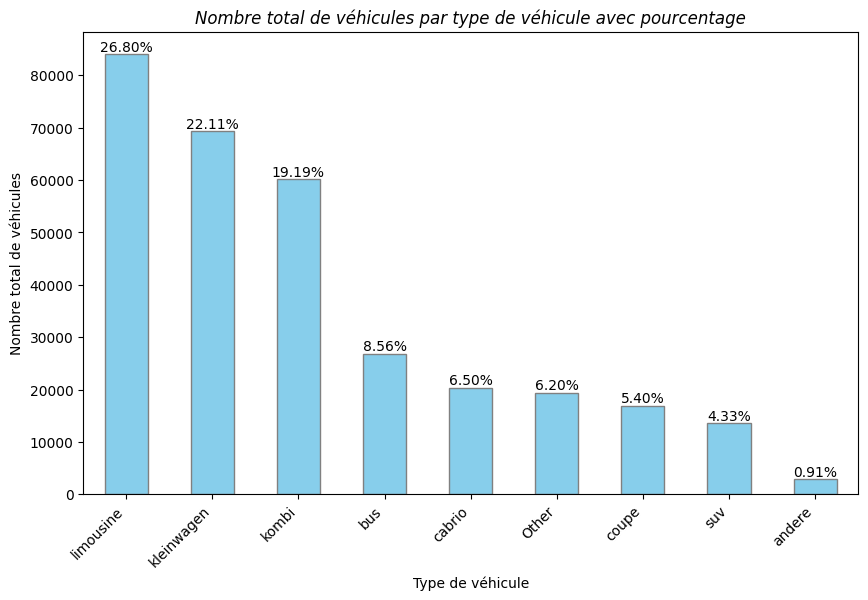

In [39]:
# Numbers of vehicle types
vehicle_type_counts = df['vehicleType'].value_counts()

# Total number of vehicles
total_cars = vehicle_type_counts.sum()

# Calculate percentages
percentages = (vehicle_type_counts / total_cars) * 100

# Bar chart drawing
plt.figure(figsize=(10, 6))
bars = vehicle_type_counts.plot(kind='bar', color='skyblue', edgecolor='grey')  # Gri çerçeve ekleme

# Add percentages
for bar, percentage in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Nombre total de véhicules par type de véhicule avec pourcentage', fontstyle='italic')  
plt.xlabel('Type de véhicule')
plt.ylabel('Nombre total de véhicules')
plt.xticks(rotation=45, ha='right')  
plt.show()

####  - Répartition des véhicules en fonction de l'année d'immatriculation


In [40]:
df['yearOfRegistration'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 1998, 2005, 1910, 2016,
       2007, 2009, 2002, 1997, 1990, 1981, 2003, 1994, 1991, 1984, 2006,
       1999, 2012, 2010, 2000, 1992, 1996, 1985, 1989, 1982, 2014, 2013,
       1976, 1983, 1973, 2015, 1969, 1971, 1987, 1986, 1988, 1970, 1965,
       1945, 1925, 1979, 1974, 1955, 1978, 1972, 1968, 1977, 1961, 1960,
       1966, 1975, 1963, 1964, 1954, 1958, 1967, 1959, 1941, 1962, 1957,
       1937, 1951, 1953, 1956, 1933, 1950, 1952, 1932, 1942, 1935, 1923,
       1930, 1944, 1929, 1943, 1934, 1938, 1928, 1919, 1948, 1931, 1915,
       1947, 1927, 1936, 1946])

In [41]:
df['yearOfRegistration'].value_counts()

yearOfRegistration
2000    24299
1999    22699
2005    21199
2001    20056
2003    19634
        ...  
1915        1
1947        1
1927        1
1936        1
1946        1
Name: count, Length: 92, dtype: int64

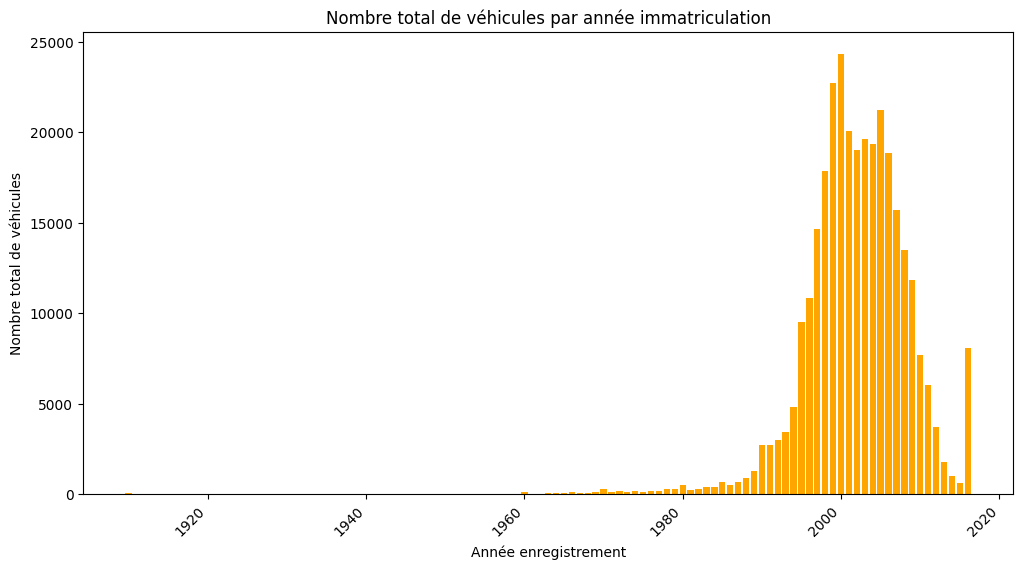

In [42]:
# Registration years
registration_years = df['yearOfRegistration'].unique()

# Number of vehicles according to registration years
registration_year_counts = df['yearOfRegistration'].value_counts()

# graphic drawing
plt.figure(figsize=(12, 6))
plt.bar(registration_year_counts.index, registration_year_counts.values, color='orange')
plt.title('Nombre total de véhicules par année immatriculation')
plt.xlabel('Année enregistrement')
plt.ylabel('Nombre total de véhicules')
plt.xticks(rotation=45, ha='right')  
plt.show()

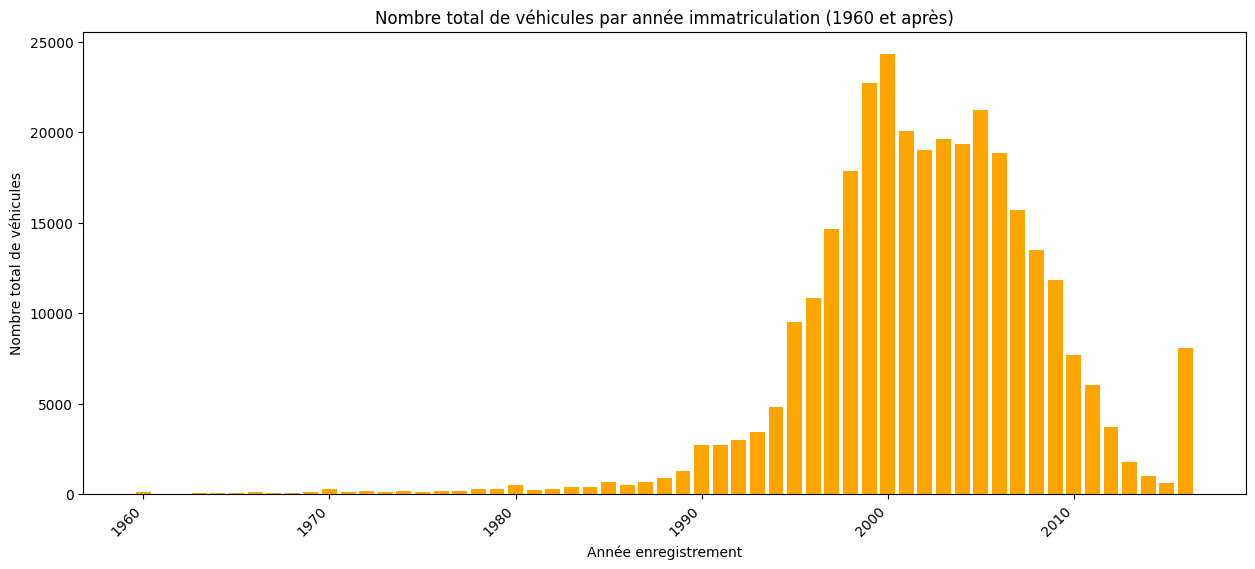

In [43]:
# Filter records after 1960
df_filtered = df[df['yearOfRegistration'] >= 1960]

# Number of vehicles according to registration years
registration_year_counts = df_filtered['yearOfRegistration'].value_counts().sort_index()

# graphic drawing
plt.figure(figsize=(15, 6))
plt.bar(registration_year_counts.index, registration_year_counts.values, color='orange')
plt.title('Nombre total de véhicules par année immatriculation (1960 et après)')
plt.xlabel('Année enregistrement')
plt.ylabel('Nombre total de véhicules')
plt.xticks(rotation=45, ha='right')  # Rotate axis labels
plt.show()

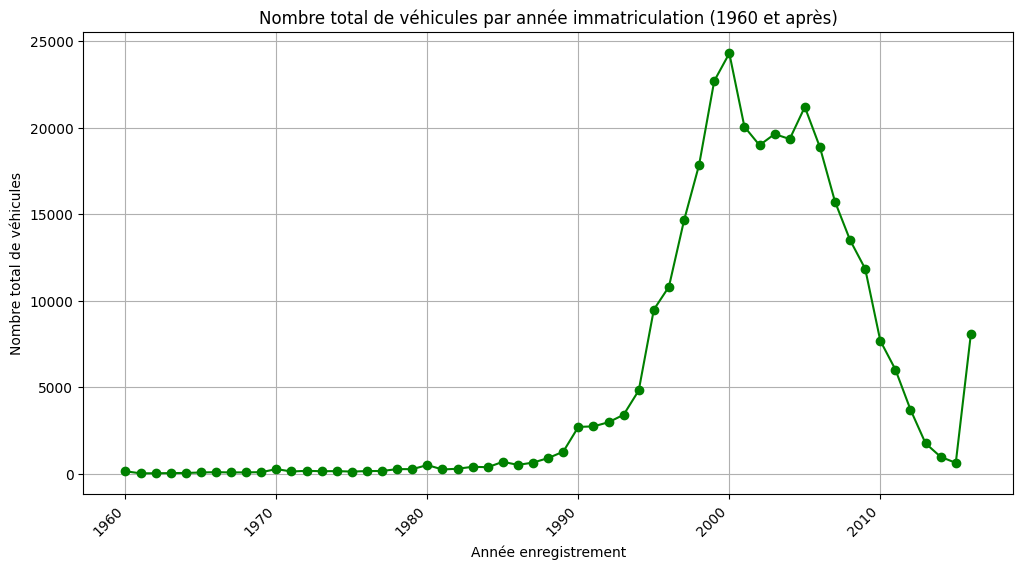

In [44]:
# Filter records after 1960
df_filtered = df[df['yearOfRegistration'] >= 1960]

# Number of vehicles according to registration years
registration_year_counts = df_filtered['yearOfRegistration'].value_counts().sort_index()

# Graphic drawing
plt.figure(figsize=(12, 6))
plt.plot(registration_year_counts.index, registration_year_counts.values, marker='o', color='green', linestyle='-')
plt.title('Nombre total de véhicules par année immatriculation (1960 et après)')
plt.xlabel('Année enregistrement')
plt.ylabel('Nombre total de véhicules')
plt.xticks(rotation=45, ha='right') 
plt.grid(True)
plt.show()

###  - Nombre de véhicules par marque

In [45]:
df['brand'].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'mazda',
       'nissan', 'ford', 'renault', 'mercedes_benz', 'seat', 'honda',
       'fiat', 'opel', 'mini', 'smart', 'hyundai', 'sonstige_autos',
       'alfa_romeo', 'subaru', 'volvo', 'mitsubishi', 'kia', 'suzuki',
       'lancia', 'citroen', 'toyota', 'chevrolet', 'dacia', 'daihatsu',
       'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo', 'porsche',
       'rover', 'land_rover', 'lada'], dtype=object)

In [46]:
df['brand'].value_counts()

brand
volkswagen        66957
opel              36146
bmw               32624
mercedes_benz     28680
audi              25211
ford              22718
renault           16384
peugeot           10255
fiat               8360
seat               5606
mazda              5209
citroen            4635
skoda              4626
smart              4565
nissan             4444
toyota             4020
hyundai            3168
volvo              3047
sonstige_autos     2966
mitsubishi         2829
honda              2526
kia                2186
alfa_romeo         2069
suzuki             2050
mini               1793
chevrolet          1577
chrysler           1339
porsche             838
dacia               790
daihatsu            773
jeep                713
subaru              688
land_rover          602
trabant             534
daewoo              512
saab                507
rover               458
jaguar              443
lancia              434
lada                216
Name: count, dtype: int64

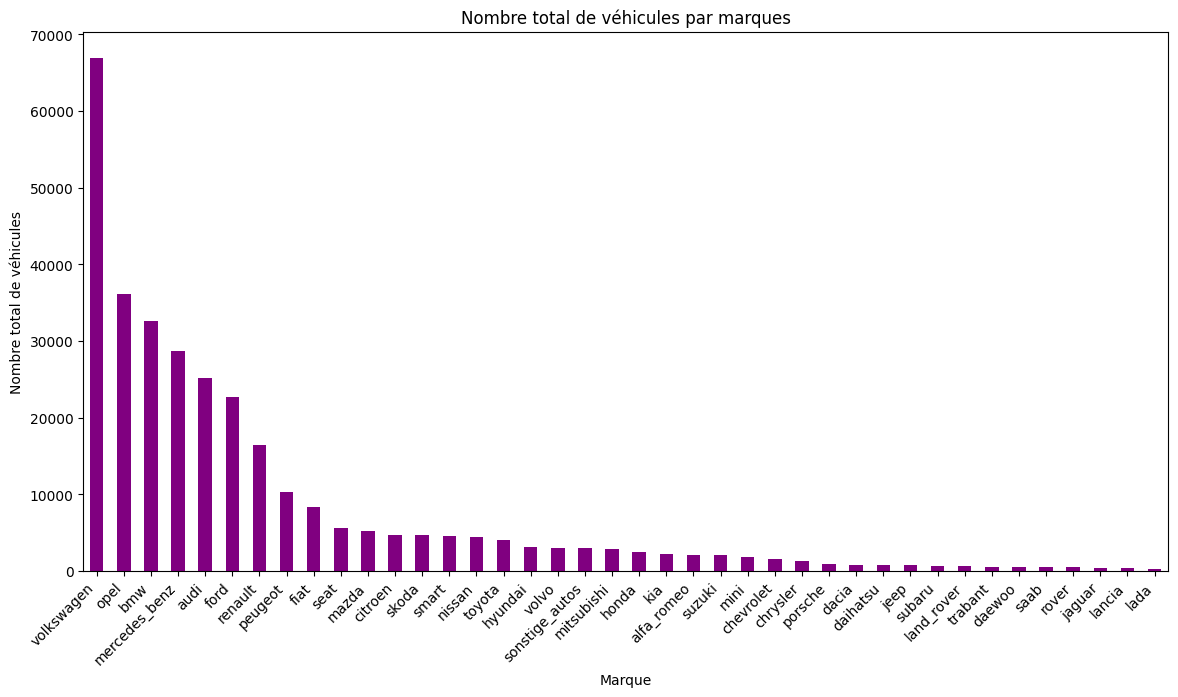

In [47]:
# Number of vehicles by brands
brand_counts = df['brand'].value_counts()

# Bar chart drawing
plt.figure(figsize=(14, 7))
brand_counts.plot(kind='bar', color='purple')
plt.title('Nombre total de véhicules par marques')
plt.xlabel('Marque')
plt.ylabel('Nombre total de véhicules')
plt.xticks(rotation=45, ha='right')  
plt.show()

###  - Prix moyen des véhicules par type de véhicule et type de boîte de vitesses

#### Prix moyen des véhicules par type

In [48]:
df['vehicleType'].unique()

array(['Other', 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio',
       'kombi', 'bus', 'andere'], dtype=object)

In [49]:
# Group by 'vehicleType' column and get averages
average_prices_by_type = df.groupby('vehicleType')['price'].mean().reset_index()
average_prices_by_type = average_prices_by_type.sort_values(by='price', ascending=False)
average_prices_by_type

,vehicleType,price
8,suv,10776.166753
3,cabrio,6935.552792
4,coupe,6741.214932
2,bus,4678.075865
6,kombi,3961.836718
7,limousine,3746.012341
1,andere,2418.150331
5,kleinwagen,1730.483371
0,Other,861.710579


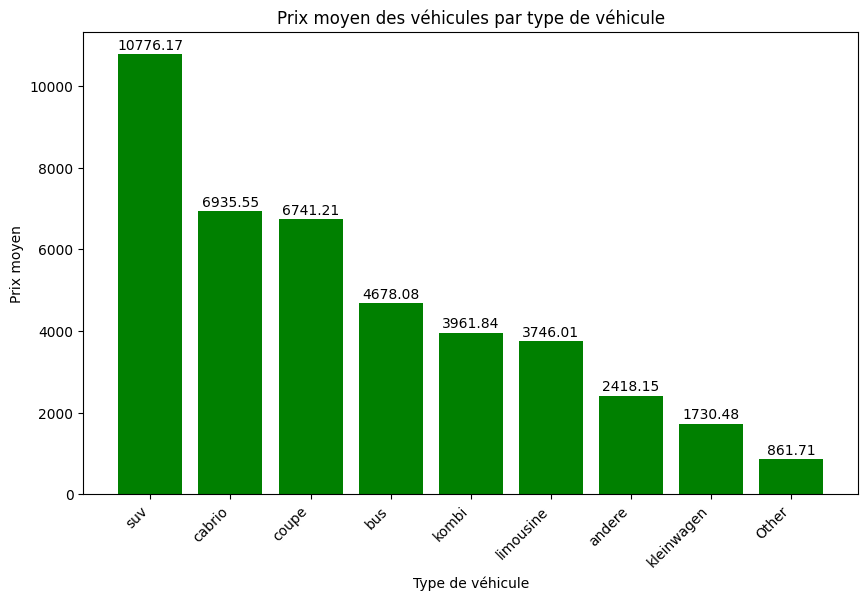

In [50]:
# Graphic drawing
plt.figure(figsize=(10, 6))
bars = plt.bar(average_prices_by_type['vehicleType'], average_prices_by_type['price'], color='green')
plt.title('Prix moyen des véhicules par type de véhicule')
plt.xlabel('Type de véhicule')
plt.ylabel('Prix moyen')
plt.xticks(rotation=45, ha='right')  

# Add average prices above each bar
for bar, avg_price in zip(bars, average_prices_by_type['price']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{avg_price:.2f}', ha='center', va='bottom')

plt.show()

#### Prix moyen des type de boîte de vitesses

In [51]:
df['gearbox'].unique()

array(['manuell', 'automatik', 'Unspecified'], dtype=object)

In [52]:
average_prices_by_gearbox = df.groupby('gearbox')['price'].mean().reset_index()
average_prices_by_gearbox = average_prices_by_gearbox.sort_values(by='price', ascending=False)
average_prices_by_gearbox

,gearbox,price
1,automatik,6230.491691
2,manuell,3492.486577
0,Unspecified,1807.165614


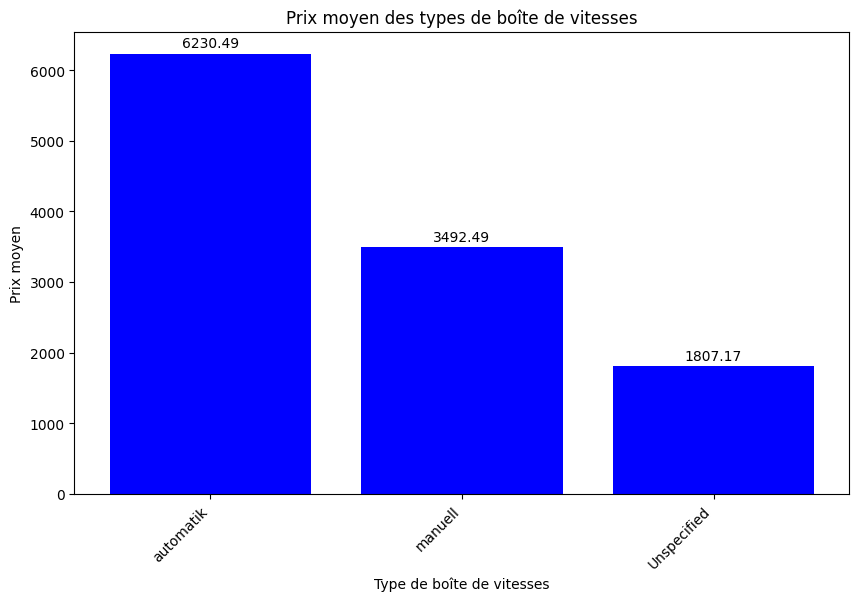

In [53]:
# Graphic drawing
plt.figure(figsize=(10, 6))
bars = plt.bar(average_prices_by_gearbox['gearbox'], average_prices_by_gearbox['price'], color='blue')
plt.title('Prix moyen des types de boîte de vitesses')
plt.xlabel('Type de boîte de vitesses')
plt.ylabel('Prix moyen')
plt.xticks(rotation=45, ha='right')  

# Add average prices above each bar
for bar, avg_price in zip(bars, average_prices_by_gearbox['price']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{avg_price:.2f}', ha='center', va='bottom')
plt.show()

###  - Prix moyen des véhicules selon le type de carburant et le type de boîte de vitesses

#### - Prix moyen des véhicules selon le type de carburant

In [54]:
df['fuelType'].unique()

array(['Gasoline', 'Diesel', 'Other', 'Lpg', 'Hybrid', 'Cng', 'Electric'],
      dtype=object)

In [55]:
# Group by 'fuelType' column and get averages
average_prices_by_fuelType = df.groupby('fuelType')['price'].mean().reset_index()

# Sort descending by 'price' column
average_prices_by_fuelType = average_prices_by_fuelType.sort_values(by='price', ascending=False)
average_prices_by_fuelType

,fuelType,price
4,Hybrid,7706.666667
1,Diesel,5881.953842
2,Electric,4672.280702
0,Cng,4137.931102
5,Lpg,4013.037257
3,Gasoline,3309.104373
6,Other,1717.451972


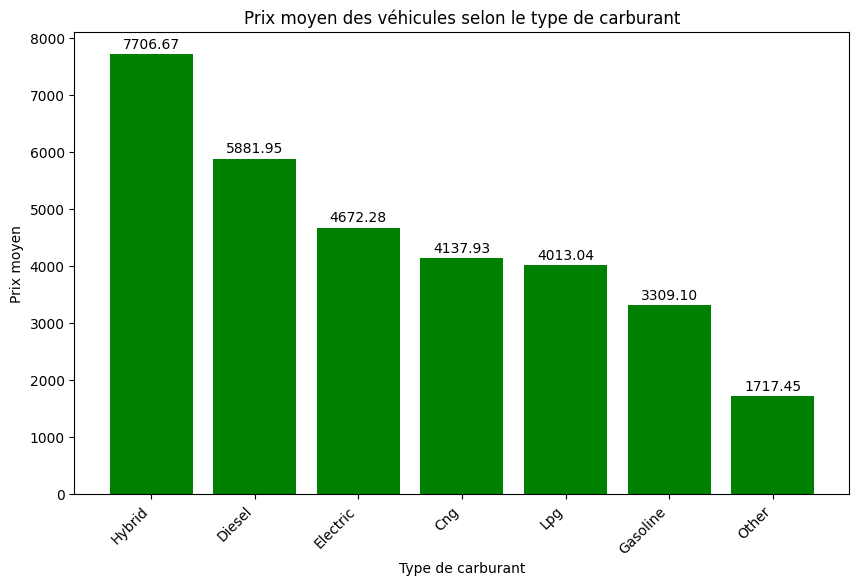

In [56]:
# Graphic drawing
plt.figure(figsize=(10, 6))
bars = plt.bar(average_prices_by_fuelType['fuelType'], average_prices_by_fuelType['price'], color='green')
plt.title('Prix moyen des véhicules selon le type de carburant')
plt.xlabel('Type de carburant')
plt.ylabel('Prix moyen')
plt.xticks(rotation=45, ha='right')  

# Add average prices above each bar
for bar, avg_price in zip(bars, average_prices_by_fuelType['price']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{avg_price:.2f}', ha='center', va='bottom')

plt.show()

#### Prix moyen des véhicules selon le type de boîte de vitesses

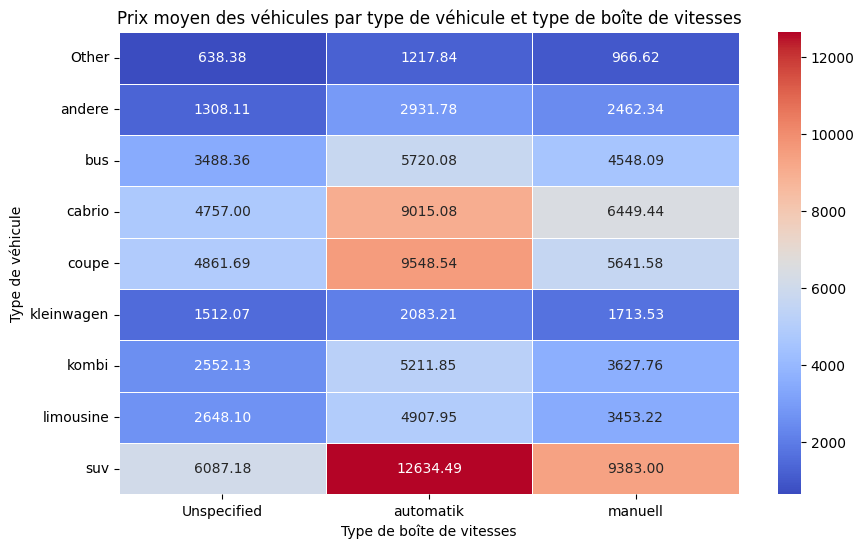

In [58]:
# Group by 'vehicleType' and 'gearbox' columns and get averages
average_prices_by_type_and_gearbox = df.groupby(['vehicleType', 'gearbox'])['price'].mean().reset_index()

# Visualizing data with heatmap
plt.figure(figsize=(10, 6))
heatmap_data = average_prices_by_type_and_gearbox.pivot(index='vehicleType', columns='gearbox', values='price')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Prix moyen des véhicules par type de véhicule et type de boîte de vitesses')
plt.xlabel('Type de boîte de vitesses')
plt.ylabel('Type de véhicule')
plt.show()


In [59]:
df['vehicleType'].unique()

array(['Other', 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio',
       'kombi', 'bus', 'andere'], dtype=object)

In [61]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

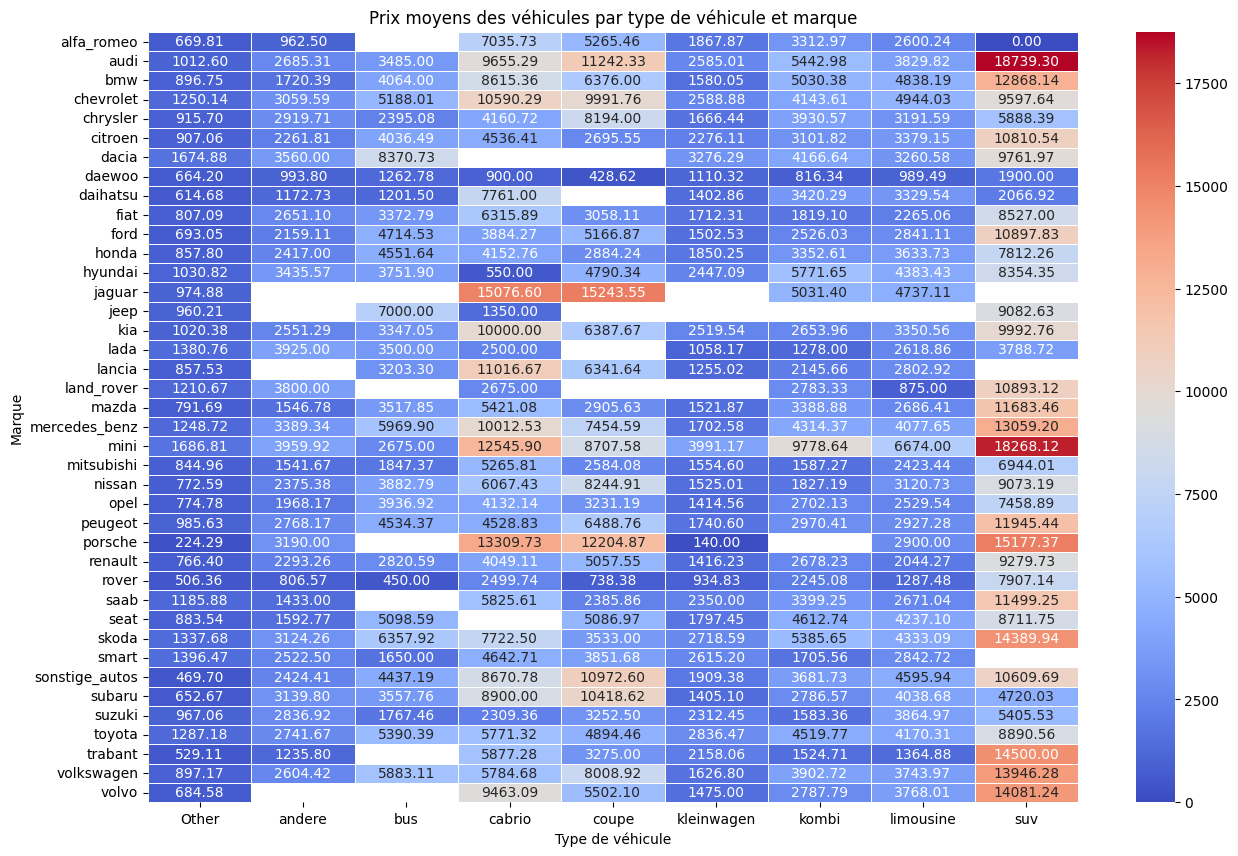

In [63]:
# Grouping and averaging by vehicle type and brand
average_prices_by_type_and_brand = df.groupby(['vehicleType', 'brand'])['price'].mean().reset_index()

# Visualizing data with heatmap
plt.figure(figsize=(15, 10))
heatmap_data = average_prices_by_type_and_brand.pivot(index='brand', columns='vehicleType', values='price')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Prix moyens des véhicules par type de véhicule et marque')
plt.xlabel('Type de véhicule')
plt.ylabel('Marque')
plt.show()
